In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
import load_data

df = load_data.load_county_level()
df = df.sort_values('tot_deaths', ascending=False)
important_vars = load_data.important_keys(df)
print(df.keys())

Loading BokehJS ...

Index(['id', 'Header-FIPSStandCtyCode', 'EntityofFile',
       'SecondaryEntityOfFile', 'DateofFile', 'DateofCreation', 'FileLength',
       'StateName', 'StateNameAbbreviation', 'CountyName',
       ...
       '#Deaths_3/21/20', '#Deaths_3/22/20', '#Deaths_3/23/20',
       '#Deaths_3/24/20', '#Deaths_3/25/20', '#Deaths_3/26/20', 'deaths',
       'cases', 'tot_deaths', 'tot_cases'],
      dtype='object', length=7316)


## how many deaths/cases are there

In [2]:
df[['tot_deaths', 'tot_cases', 'StateName', 'CountyName', ]].head(10)

,tot_deaths,tot_cases,StateName,CountyName
994,365,23112,New York,New York
1548,109,1577,Washington,King
615,46,997,Louisiana,Orleans
741,26,1389,Michigan,Wayne
1011,22,2735,New York,Suffolk
116,21,1216,California,Los Angeles
137,19,542,California,Santa Clara
993,19,3914,New York,Nassau
374,18,1904,Illinois,Cook
933,17,1206,New Jersey,Bergen


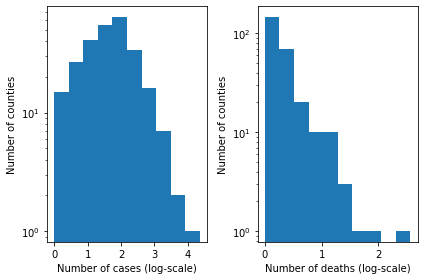

In [3]:
d = df[df['tot_deaths'] > 0]
R, C = 1, 2
plt.subplot(R, C, 1)
plt.hist(np.log10(d['tot_cases']))
plt.xlabel('Number of cases (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')

plt.subplot(R, C, 2)
plt.hist(np.log10(d['tot_deaths']))
plt.xlabel('Number of deaths (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')
plt.tight_layout()
plt.show()

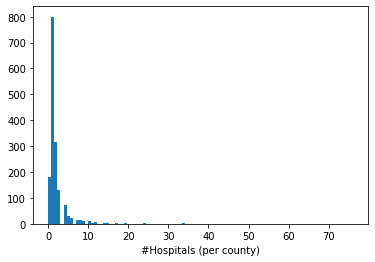

In [4]:
plt.hist(df['#Hospitals'], bins=100)
plt.xlabel('#Hospitals (per county)')
plt.show()

# correlations

In [ ]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df[[k for k in important_vars if not 'PopMale' in k and not 'PopFmle' in k and not 'MortalityAge' in k and not 'PopTotal' in k] + 
        ['tot_deaths', 'tot_cases']]

# Compute the correlation matrix
corrs = d.corr(method='spearman')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(8, 8), dpi=300)
sns.heatmap(corrs, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sns.clustermap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('results/correlations_heatmap.png')
plt.show()

In [ ]:
keys = np.array(corrs.index)
k = np.where(keys == 'tot_deaths')[0][0]
corrs_row = corrs.iloc[k]
args = np.argsort(corrs_row)
plt.figure(dpi=300, figsize=(6, 5))
plt.barh(keys[args][:-1], corrs_row[args][:-1]) # 1 to drop outcome itself
plt.xlabel('Correlation (spearman) with # deaths')
plt.tight_layout()
plt.savefig('results/correlations.png')
plt.show()

# interactive plots

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute='tot_cases',
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    
    output_file(f"results/{state}.html", mode='inline')
    show(p)
    save(p)

In [ ]:
sorted(list([k for k in df.keys() if '' in k.lower()]))

## plot political leaning

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute='dem_to_rep_ratio',
                          variables_to_display=[k for k in important_vars 
                                                if not 'PopMale' in k and not 'PopFmle' in k 
                                                and not '3YrMortality' in k],
                          state=state,
                          logcolor=False)
    show(p)